## `Import Statements`



In [3]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels

# plotly, matplotlib, seaborn, pandas

In [4]:
insurance = pd.read_csv('Data/insurance.csv')

In [4]:
insurance.head(99999)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Linear Regression Plots



In [29]:
fig = px.scatter(insurance, x='bmi', y='charges', opacity=0.65, trendline='ols', trendline_color_override='darkred')
fig.show()

In [32]:
fig = px.scatter(insurance, x='age', y='charges', opacity=0.65, trendline='ols', trendline_color_override='teal')
fig.show()

In [33]:
px.scatter(insurance,'smoker',charges')

In [11]:
px.scatter(insurance,'bmi','charges')

In [30]:
px.scatter(insurance,'bmi','charges',color = 'smoker',symbol = 'sex')

In [37]:
px.imshow(pd.crosstab(insurance['children'],insurance['smoker']))

In [6]:
px.scatter(insurance, x="age", y="charges", color="sex")

In [7]:
px.bar(insurance, x="sex", y="charges")

In [9]:
px.bar(insurance, x="region", y="charges")

In [13]:
px.pie(insurance, values="smoker", names="region")

In [20]:
# import matplotlib.pyplot as plt

# plt.pie(insurance["region"], insurance["smoker"])

insurance.head()

#insurance.groupby("region")["bmi"].mean()

# Convert smoker from (Yes, No) --> (1, 0)
# groupby("...")["smoker"].mean()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
def convert_to_binary(sm):
    if sm == "yes":
        return 1
    elif sm == "no":
        return 0

insurance["binary_smoker"] = insurance["smoker"].apply(convert_to_binary)

insurance.groupby("region")["binary_smoker"].mean()

region
northeast    0.206790
northwest    0.178462
southeast    0.250000
southwest    0.178462
Name: binary_smoker, dtype: float64

In [16]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,binary_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [20]:
x = insurance[["region", "binary_smoker"]]
x = x[x["binary_smoker"] == 1]
x.head()

,region,binary_smoker
0,southwest,1
11,southeast,1
14,southeast,1
19,southwest,1
23,northeast,1


([<matplotlib.patches.Wedge at 0x7f60a3998b50>,
 [Text(0.7910790510561727, 0.7643258042092165, 'northeast'),
  Text(-0.6486028040891509, 0.8884336793074037, 'northwest'),
  Text(-0.7910790510561729, -0.7643258042092163, 'southeast'),
  Text(0.8656025814656391, -0.6787725472940269, 'southwest')])

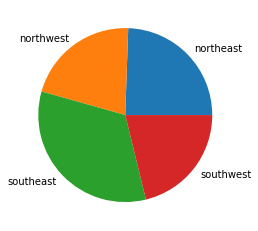

In [23]:
m = x.groupby("region").count()
import matplotlib.pyplot as plt 
plt.pie(m.binary_smoker, labels = m.index)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: binary_smoker, Length: 1338, dtype: int64